In [302]:
import pandas as pd
import numpy as np

In [303]:
ffr = pd.read_csv('~/Downloads/DFF.csv')

In [304]:
ffr.rename(columns={'DATE': 'Date'}, inplace=True)

In [305]:
import requests
from bs4 import BeautifulSoup

# URL to webscrape
url = 'https://www.cmegroup.com/markets/interest-rates/cme-fedwatch-tool.html'

In [306]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.action_chains import ActionChains
from selenium import webdriver
import time

driver = webdriver.Chrome(executable_path='C:/temp/chromedriver.exe')
driver.set_page_load_timeout(300)

driver.get("https://www.cmegroup.com/trading/interest-rates/countdown-to-fomc.html")

time.sleep(2)

driver.switch_to.frame(driver.find_element(By.TAG_NAME,"iframe"))
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(2)
element = driver.find_element(By.LINK_TEXT, "Downloads")
driver.execute_script("arguments[0].click();", element)

time.sleep(2)

links = driver.find_elements(By.TAG_NAME, "a")

data = {}
for link in links:
    data[link.text] = link.get_attribute('href')


/var/folders/hm/36htpvln1h7d8k8hnh40nt4h0000gn/T/ipykernel_16792/177383612.py:10: DeprecationWarning:

executable_path has been deprecated, please pass in a Service object



In [307]:
data

{'': 'https://cmegroup-tools.quikstrike.net/User/QuikStrikeView.aspx?viewitemid=IntegratedFedWatchTool&userId=lwolf&jobRole=&company=&companyType=&userId=lwolf&jobRole=&company=&companyType=&insid=91090698&qsid=aa0d79a3-797f-471c-a1f4-b2545d6dc2b5#',
 'Current': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbCurrent','')",
 'Compare': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbCompare','')",
 'Probabilities': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbPTree','')",
 'Historical': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbHistorical','')",
 'Downloads': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbDownloads','')",
 'Prior Hikes': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_IntegratedFedWatchTool$lbMH','')",
 'Chart': "javascript:__doPostBack('ctl00$MainContent$ucViewControl_Integrat

In [462]:
reports = {}
for k,v in data.items():
    if '20' in k:
        reports[k] = v

In [463]:
dfs = {}
for key, url in reports.items():
    dfs[key] = pd.read_csv(url)
    dfs[key]['contract'] = key

In [464]:
for k,v in dfs.items():
    print(len(v))

172
204
238
250
250
250
250
250
233
176
176
137
78
78
12
0
0


In [465]:
len(dfs)

17

In [466]:
df = pd.concat([i for i in dfs.values()])

In [467]:
df.sort_values(by = 'Date', ascending = True)

,Date,(0-25),(25-50),(50-75),(75-100),(100-125),(125-150),(150-175),(175-200),(200-225),...,(1825-1850),(1850-1875),(1875-1900),(1900-1925),(1925-1950),(1950-1975),(1975-2000),(2000-2025),(2025-2050),(2050-2075)
183,01/03/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,01/03/2023,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,01/03/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,01/03/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,01/03/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,12/30/2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,12/30/2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,12/30/2022,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,12/30/2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [468]:
df = df[df['Date'].notna()]

In [469]:
rates = [i for i in df.columns if i != 'Date' and i != 'contract']

In [470]:
rateset = list(set(rates))
rates

['(0-25)',
 '(25-50)',
 '(50-75)',
 '(75-100)',
 '(100-125)',
 '(125-150)',
 '(150-175)',
 '(175-200)',
 '(200-225)',
 '(225-250)',
 '(250-275)',
 '(275-300)',
 '(300-325)',
 '(325-350)',
 '(350-375)',
 '(375-400)',
 '(400-425)',
 '(425-450)',
 '(450-475)',
 '(475-500)',
 '(500-525)',
 '(525-550)',
 '(550-575)',
 '(575-600)',
 '(600-625)',
 '(625-650)',
 '(650-675)',
 '(675-700)',
 '(700-725)',
 '(725-750)',
 '(750-775)',
 '(775-800)',
 '(800-825)',
 '(825-850)',
 '(850-875)',
 '(875-900)',
 '(900-925)',
 '(925-950)',
 '(950-975)',
 '(975-1000)',
 '(1000-1025)',
 '(1025-1050)',
 '(1050-1075)',
 '(1075-1100)',
 '(1100-1125)',
 '(1125-1150)',
 '(1150-1175)',
 '(1175-1200)',
 '(1200-1225)',
 '(1225-1250)',
 '(1250-1275)',
 '(1275-1300)',
 '(1300-1325)',
 '(1325-1350)',
 '(1350-1375)',
 '(1375-1400)',
 '(1400-1425)',
 '(1425-1450)',
 '(1450-1475)',
 '(1475-1500)',
 '(1500-1525)',
 '(1525-1550)',
 '(1550-1575)',
 '(1575-1600)',
 '(1600-1625)',
 '(1625-1650)',
 '(1650-1675)',
 '(1675-1700)',

In [471]:
ratevals = []
for i in rates:
    a = i.replace('(', "").replace(")","").split('-')[0]
    if float(a) < 25:
        a = float(a) * 1000
    
    b = i.replace('(', "").replace(")","").split('-')[1]
    if float(b) < 25:
        b = float(b) * 1000

    val = (int(a) + int(b)) / 2
    ratevals.append(str(val))

In [472]:
rename = dict(zip(rates, ratevals))

In [473]:
ffr['Date'] =  pd.to_datetime(ffr['Date'], infer_datetime_format=True)
df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format=True)
df['contract'] =  pd.to_datetime(df['contract'], infer_datetime_format=True)

In [474]:
df.rename(columns = rename, inplace = True)

In [475]:
df = df.reindex(sorted(df.columns), axis=1)

In [476]:
df

,1012.5,1037.5,1062.5,1087.5,1112.5,112.5,1137.5,1162.5,1187.5,12.5,...,837.5,862.5,87.5,887.5,912.5,937.5,962.5,987.5,Date,contract
0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-11,2022-12-14
1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-12,2022-12-14
2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-13,2022-12-14
3,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-14,2022-12-14
4,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-18,2022-12-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-03,2024-09-25
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-04,2024-09-25
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-05,2024-09-25
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-06,2024-09-25


In [477]:
df = df.join(ffr.set_index('Date'), on='Date')

In [478]:
df.DFF = df.DFF * 100

In [479]:
df.sort_values(by = 'Date', ascending = True)

,1012.5,1037.5,1062.5,1087.5,1112.5,112.5,1137.5,1162.5,1187.5,12.5,...,862.5,87.5,887.5,912.5,937.5,962.5,987.5,Date,contract,DFF
0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-11,2022-12-14,33.0
0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-04-11,2023-03-22,33.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-04-11,2023-05-03,33.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-04-11,2023-06-14,33.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-04-11,2023-07-26,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-07,2023-05-03,NaN
249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-07,2023-06-14,NaN
136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-07,2024-05-01,NaN
175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-07,2024-01-31,NaN


In [480]:
import yfinance as yf
btc = yf.download('BTC-USD', start='2022-04-07', end='2023-04-06')

[*********************100%***********************]  1 of 1 completed


In [481]:
btc.drop(columns = [i for i in btc.columns if i != 'Open' and i!= 'Volume'], inplace = True)

In [482]:
btc.rename(columns = {'Open': 'btcopen', 'Volume':'btcvolume'}, inplace = True)

In [483]:
df

,1012.5,1037.5,1062.5,1087.5,1112.5,112.5,1137.5,1162.5,1187.5,12.5,...,862.5,87.5,887.5,912.5,937.5,962.5,987.5,Date,contract,DFF
0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-11,2022-12-14,33.0
1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-12,2022-12-14,33.0
2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-13,2022-12-14,33.0
3,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-14,2022-12-14,33.0
4,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2022-04-18,2022-12-14,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-03,2024-09-25,483.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-04,2024-09-25,483.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-05,2024-09-25,483.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-04-06,2024-09-25,NaN


In [484]:
btc['Date'] =  pd.to_datetime(btc.index, infer_datetime_format=True)

In [485]:
df = df.join(btc.set_index('Date'), on='Date')

In [486]:
df

,1012.5,1037.5,1062.5,1087.5,1112.5,112.5,1137.5,1162.5,1187.5,12.5,...,887.5,912.5,937.5,962.5,987.5,Date,contract,DFF,btcopen,btcvolume
0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,2022-04-11,2022-12-14,33.0,42201.039062,3.394991e+10
1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,2022-04-12,2022-12-14,33.0,39533.714844,3.099150e+10
2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,2022-04-13,2022-12-14,33.0,40123.570312,2.769111e+10
3,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,2022-04-14,2022-12-14,33.0,41160.218750,2.434200e+10
4,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,2022-04-18,2022-12-14,33.0,39721.203125,3.370518e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-04-03,2024-09-25,483.0,28183.080078,1.955650e+10
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-04-04,2024-09-25,483.0,27795.273438,1.528454e+10
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-04-05,2024-09-25,483.0,28169.726562,1.705232e+10
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-04-06,2024-09-25,NaN,28175.226562,1.383781e+10


In [487]:
df[df.Date == '2023-03-07']

,1012.5,1037.5,1062.5,1087.5,1112.5,112.5,1137.5,1162.5,1187.5,12.5,...,887.5,912.5,937.5,962.5,987.5,Date,contract,DFF,btcopen,btcvolume
226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-03-07,2023-03-22,457.0,22428.322266,2.276545e+10
226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-03-07,2023-05-03,457.0,22428.322266,2.276545e+10
226,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-03-07,2023-06-14,457.0,22428.322266,2.276545e+10
226,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,NaN,2023-03-07,2023-07-26,457.0,22428.322266,2.276545e+10
226,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-03-07,2023-09-20,457.0,22428.322266,2.276545e+10
226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-03-07,2023-11-01,457.0,22428.322266,2.276545e+10
209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-03-07,2023-12-13,457.0,22428.322266,2.276545e+10
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-03-07,2024-01-31,457.0,22428.322266,2.276545e+10
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-03-07,2024-03-20,457.0,22428.322266,2.276545e+10
113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2023-03-07,2024-05-01,457.0,22428.322266,2.276545e+10


In [488]:
df.contract.value_counts()

2023-05-03    250
2023-06-14    250
2023-07-26    250
2023-09-20    250
2023-11-01    250
2023-03-22    238
2023-12-13    233
2023-02-01    204
2024-01-31    176
2024-03-20    176
2022-12-14    172
2024-05-01    137
2024-06-19     78
2024-07-31     78
2024-09-25     12
Name: contract, dtype: int64

In [489]:
for i in df.iloc[:, :83].columns:
    i = float(i)

In [490]:
df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format=True)

In [491]:
df.iloc[:, :83] = df.iloc[:, :83].applymap(pd.to_numeric, errors='coerce')

In [492]:
df.columns = [float(i) if isinstance(i, str) and i in ratevals else i for i in df.columns]

In [493]:
ratevals = [float(i) for i in ratevals]

In [494]:
df['mean'] = df[ratevals].apply(lambda x: x*df[ratevals].columns.values, axis=1).sum(axis=1)

In [495]:
df.sort_values(by = 'mean', ascending = False)

,1012.5,1037.5,1062.5,1087.5,1112.5,112.5,1137.5,1162.5,1187.5,12.5,...,912.5,937.5,962.5,987.5,Date,contract,DFF,btcopen,btcvolume,mean
227,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,2023-03-08,2023-09-20,457.0,22216.441406,2.253658e+10,575.154775
227,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,NaN,2023-03-08,2023-07-26,457.0,22216.441406,2.253658e+10,573.154775
226,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,2023-03-07,2023-09-20,457.0,22428.322266,2.276545e+10,570.939938
227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2023-03-08,2023-11-01,457.0,22216.441406,2.253658e+10,570.036700
226,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,NaN,2023-03-07,2023-07-26,457.0,22428.322266,2.276545e+10,568.940475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,2022-04-11,2022-12-14,33.0,42201.039062,3.394991e+10,257.500025
4,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,2022-04-18,2022-12-14,33.0,39721.203125,3.370518e+10,251.749925
3,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,2022-04-14,2022-12-14,33.0,41160.218750,2.434200e+10,251.000000
1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,2022-04-12,2022-12-14,33.0,39533.714844,3.099150e+10,246.750025


In [496]:
smalldf = df.iloc[:, 83:89]

In [497]:
smalldf.dropna(inplace = True)

In [498]:
smalldf

,Date,contract,DFF,btcopen,btcvolume,mean
0,2022-04-11,2022-12-14,33.0,42201.039062,3.394991e+10,257.500025
1,2022-04-12,2022-12-14,33.0,39533.714844,3.099150e+10,246.750025
2,2022-04-13,2022-12-14,33.0,40123.570312,2.769111e+10,242.999950
3,2022-04-14,2022-12-14,33.0,41160.218750,2.434200e+10,251.000000
4,2022-04-18,2022-12-14,33.0,39721.203125,3.370518e+10,251.749925
...,...,...,...,...,...,...
5,2023-03-30,2024-09-25,483.0,28350.140625,2.243535e+10,334.500075
6,2023-03-31,2024-09-25,483.0,28032.261719,1.900133e+10,329.500950
7,2023-04-03,2024-09-25,483.0,28183.080078,1.955650e+10,303.001062
8,2023-04-04,2024-09-25,483.0,27795.273438,1.528454e+10,282.750288


/Users/Saurbier/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



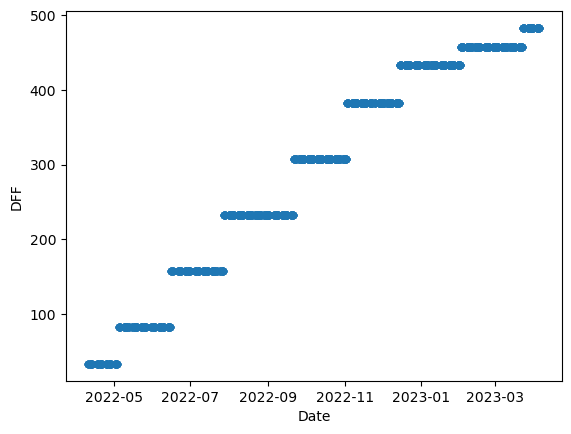

In [499]:
smalldf.plot.scatter('Date', 'DFF');

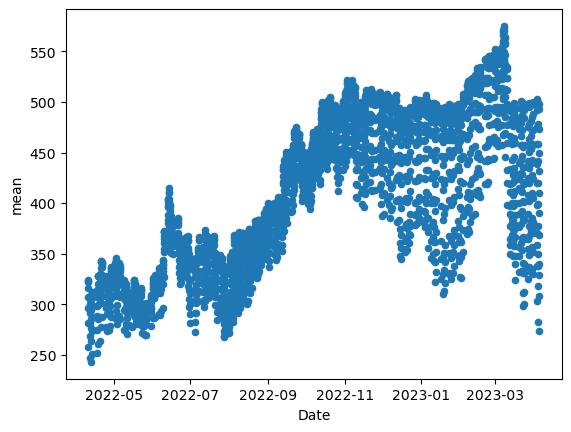

In [500]:
smalldf.plot.scatter('Date', 'mean');

In [501]:
smalldf[smalldf.Date == '2023-04-05'].sort_values(by = 'contract')

,Date,contract,DFF,btcopen,btcvolume,mean
247,2023-04-05,2023-05-03,483.0,28169.726562,1.705232e+10,498.324625
247,2023-04-05,2023-06-14,483.0,28169.726562,1.705232e+10,493.340000
247,2023-04-05,2023-07-26,483.0,28169.726562,1.705232e+10,473.499975
247,2023-04-05,2023-09-20,483.0,28169.726562,1.705232e+10,450.000000
247,2023-04-05,2023-11-01,483.0,28169.726562,1.705232e+10,431.720850
230,2023-04-05,2023-12-13,483.0,28169.726562,1.705232e+10,410.149975
173,2023-04-05,2024-01-31,483.0,28169.726562,1.705232e+10,390.000000
173,2023-04-05,2024-03-20,483.0,28169.726562,1.705232e+10,368.000437
134,2023-04-05,2024-05-01,483.0,28169.726562,1.705232e+10,340.066625
75,2023-04-05,2024-06-19,483.0,28169.726562,1.705232e+10,328.649738


In [502]:
new_df = df.pivot(index='Date', columns='contract', values='mean')

new_df = new_df.join(ffr.set_index('Date'), on='Date')

In [503]:
[i for i in new_df.columns if i != 'DFF']

[Timestamp('2022-12-14 00:00:00'),
 Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-03-22 00:00:00'),
 Timestamp('2023-05-03 00:00:00'),
 Timestamp('2023-06-14 00:00:00'),
 Timestamp('2023-07-26 00:00:00'),
 Timestamp('2023-09-20 00:00:00'),
 Timestamp('2023-11-01 00:00:00'),
 Timestamp('2023-12-13 00:00:00'),
 Timestamp('2024-01-31 00:00:00'),
 Timestamp('2024-03-20 00:00:00'),
 Timestamp('2024-05-01 00:00:00'),
 Timestamp('2024-06-19 00:00:00'),
 Timestamp('2024-07-31 00:00:00'),
 Timestamp('2024-09-25 00:00:00')]

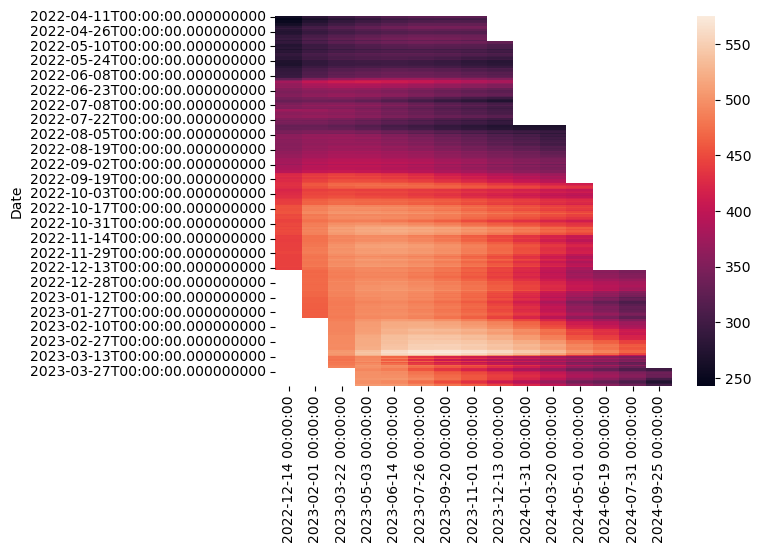

In [504]:
import seaborn as sns
sns.heatmap(new_df[[i for i in new_df.columns if i != 'DFF']]);

In [505]:
import plotly.graph_objects as go

In [506]:
x = [i for i in new_df.columns if i != 'DFF']
y = new_df.index
z = new_df.to_numpy()

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='FFR Curves',
                  width = 1200,
                  height = 1200,
                  scene = {"aspectratio": {"x": 1, "y": 1, "z": .6}})
fig.update_coloraxes(cauto=True)
#fig.update_coloraxes(cmax=2000)
#fig.update_coloraxes(cmin=2000)
fig.show()

# Cohorting

In [507]:
contractvals = sorted(list({i for i in df.contract}))

In [508]:
contractvals

[Timestamp('2022-12-14 00:00:00'),
 Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-03-22 00:00:00'),
 Timestamp('2023-05-03 00:00:00'),
 Timestamp('2023-06-14 00:00:00'),
 Timestamp('2023-07-26 00:00:00'),
 Timestamp('2023-09-20 00:00:00'),
 Timestamp('2023-11-01 00:00:00'),
 Timestamp('2023-12-13 00:00:00'),
 Timestamp('2024-01-31 00:00:00'),
 Timestamp('2024-03-20 00:00:00'),
 Timestamp('2024-05-01 00:00:00'),
 Timestamp('2024-06-19 00:00:00'),
 Timestamp('2024-07-31 00:00:00'),
 Timestamp('2024-09-25 00:00:00')]

In [517]:
smalldf2 = smalldf
smalldf2['dtm'] = (smalldf2.contract - smalldf2.Date)

In [518]:
smalldf2

,Date,contract,DFF,btcopen,btcvolume,mean,dtm
0,2022-04-11,2022-12-14,33.0,42201.039062,3.394991e+10,257.500025,247 days
1,2022-04-12,2022-12-14,33.0,39533.714844,3.099150e+10,246.750025,246 days
2,2022-04-13,2022-12-14,33.0,40123.570312,2.769111e+10,242.999950,245 days
3,2022-04-14,2022-12-14,33.0,41160.218750,2.434200e+10,251.000000,244 days
4,2022-04-18,2022-12-14,33.0,39721.203125,3.370518e+10,251.749925,240 days
...,...,...,...,...,...,...,...
5,2023-03-30,2024-09-25,483.0,28350.140625,2.243535e+10,334.500075,545 days
6,2023-03-31,2024-09-25,483.0,28032.261719,1.900133e+10,329.500950,544 days
7,2023-04-03,2024-09-25,483.0,28183.080078,1.955650e+10,303.001062,541 days
8,2023-04-04,2024-09-25,483.0,27795.273438,1.528454e+10,282.750288,540 days


In [521]:
from datetime import datetime
smalldf2.dtm = smalldf2.dtm.dt.days

In [522]:
smalldf2.dtm

0    247
1    246
2    245
3    244
4    240
    ... 
5    545
6    544
7    541
8    540
9    539
Name: dtm, Length: 2730, dtype: int64

/Users/Saurbier/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



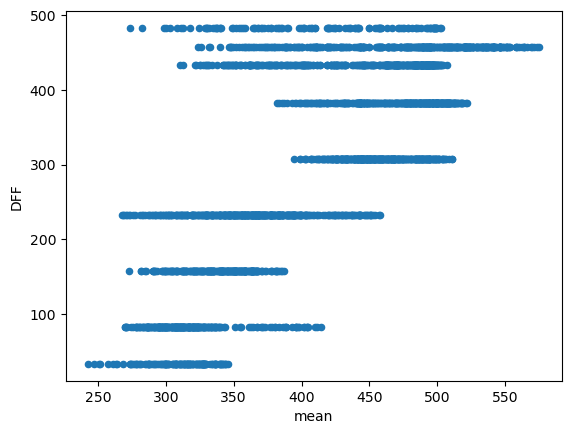

In [523]:
# useless
smalldf.plot.scatter('mean', 'DFF');

In [530]:
smalldf2['diff'] = smalldf2['mean'] - smalldf2.DFF

In [532]:
smalldf2

,Date,contract,DFF,btcopen,btcvolume,mean,dtm,diff
0,2022-04-11,2022-12-14,33.0,42201.039062,3.394991e+10,257.500025,247,224.500025
1,2022-04-12,2022-12-14,33.0,39533.714844,3.099150e+10,246.750025,246,213.750025
2,2022-04-13,2022-12-14,33.0,40123.570312,2.769111e+10,242.999950,245,209.999950
3,2022-04-14,2022-12-14,33.0,41160.218750,2.434200e+10,251.000000,244,218.000000
4,2022-04-18,2022-12-14,33.0,39721.203125,3.370518e+10,251.749925,240,218.749925
...,...,...,...,...,...,...,...,...
5,2023-03-30,2024-09-25,483.0,28350.140625,2.243535e+10,334.500075,545,-148.499925
6,2023-03-31,2024-09-25,483.0,28032.261719,1.900133e+10,329.500950,544,-153.499050
7,2023-04-03,2024-09-25,483.0,28183.080078,1.955650e+10,303.001062,541,-179.998938
8,2023-04-04,2024-09-25,483.0,27795.273438,1.528454e+10,282.750288,540,-200.249712


/Users/Saurbier/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



contract
2022-12-14    AxesSubplot(0.125,0.11;0.775x0.77)
2023-02-01    AxesSubplot(0.125,0.11;0.775x0.77)
2023-03-22    AxesSubplot(0.125,0.11;0.775x0.77)
2023-05-03    AxesSubplot(0.125,0.11;0.775x0.77)
2023-06-14    AxesSubplot(0.125,0.11;0.775x0.77)
2023-07-26    AxesSubplot(0.125,0.11;0.775x0.77)
2023-09-20    AxesSubplot(0.125,0.11;0.775x0.77)
2023-11-01    AxesSubplot(0.125,0.11;0.775x0.77)
2023-12-13    AxesSubplot(0.125,0.11;0.775x0.77)
2024-01-31    AxesSubplot(0.125,0.11;0.775x0.77)
2024-03-20    AxesSubplot(0.125,0.11;0.775x0.77)
2024-05-01    AxesSubplot(0.125,0.11;0.775x0.77)
2024-06-19    AxesSubplot(0.125,0.11;0.775x0.77)
2024-07-31    AxesSubplot(0.125,0.11;0.775x0.77)
2024-09-25    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

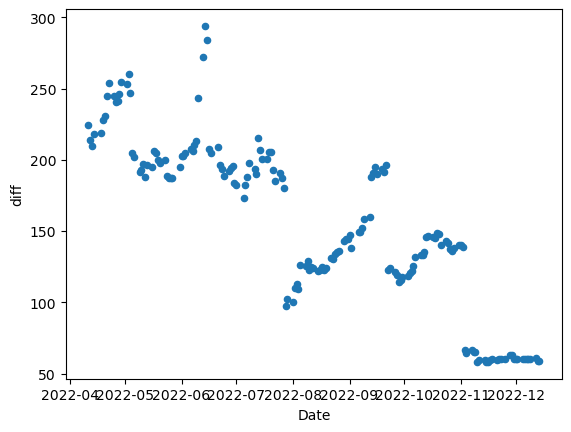

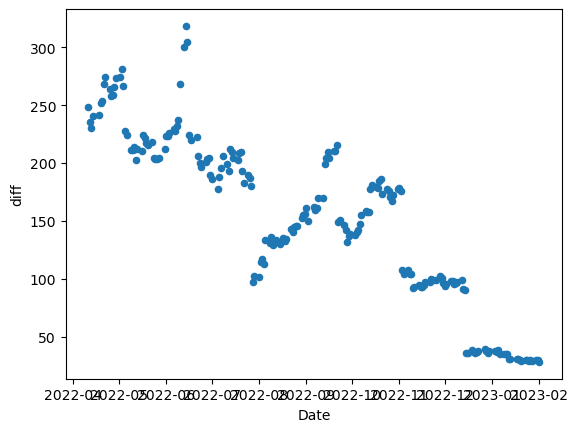

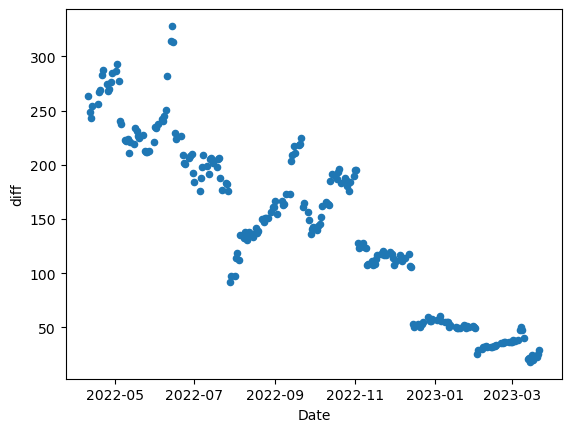

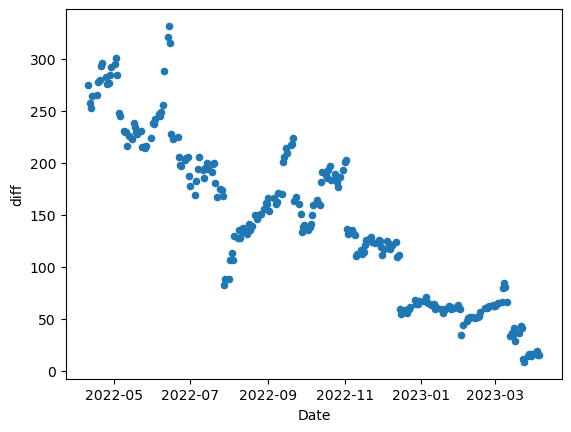

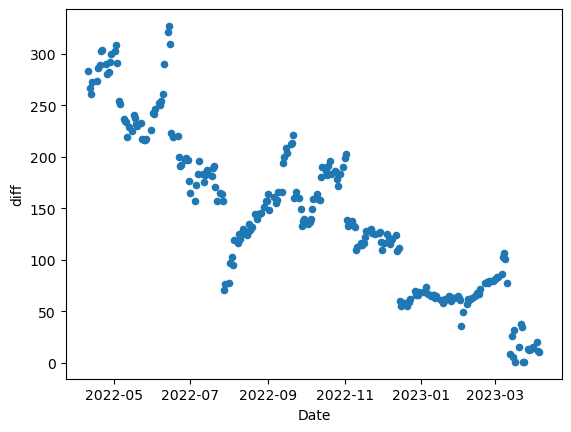

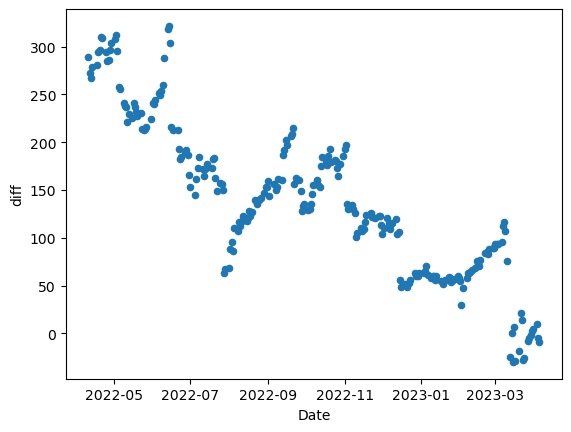

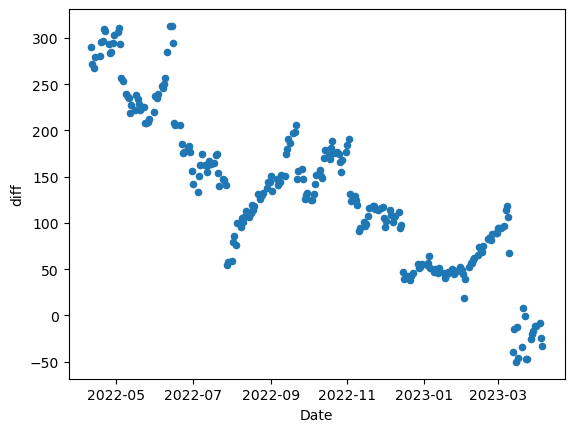

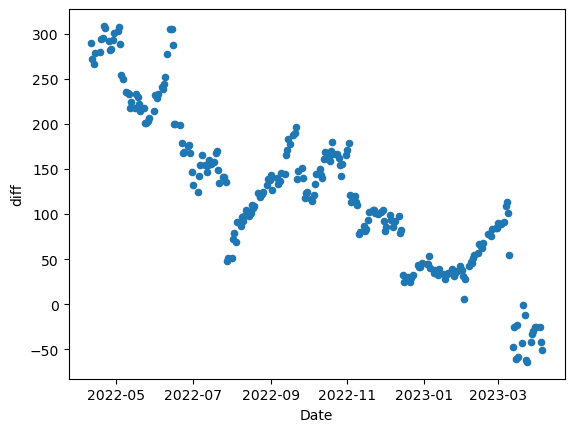

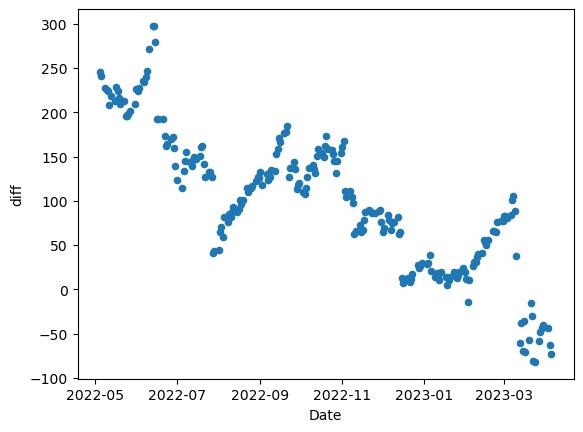

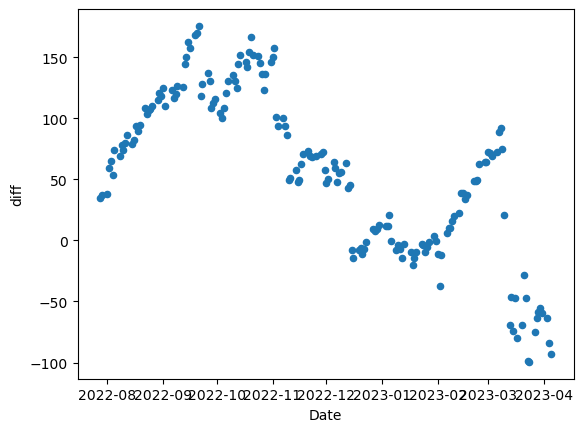

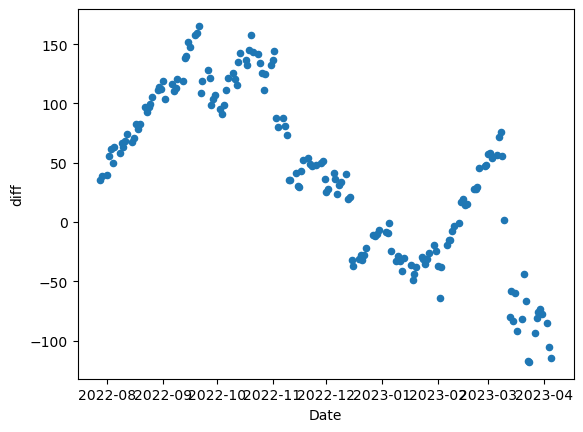

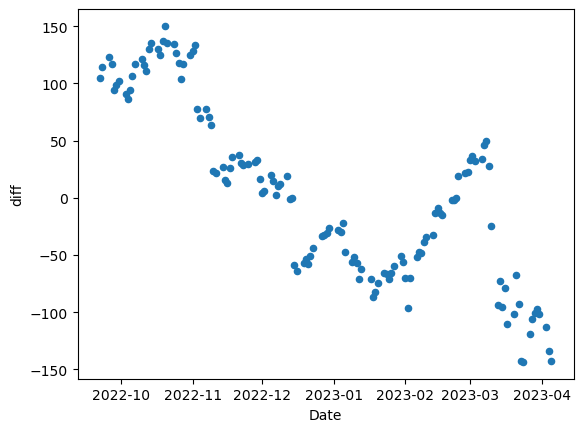

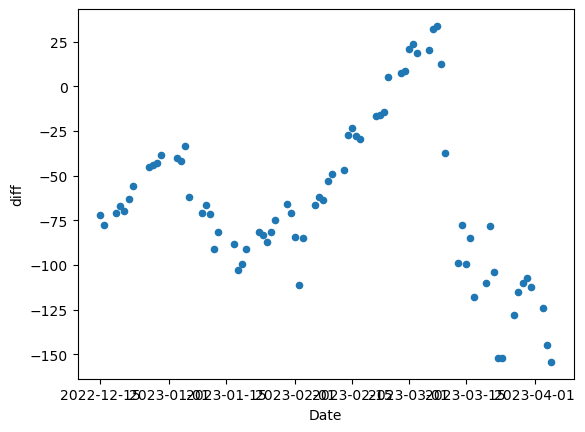

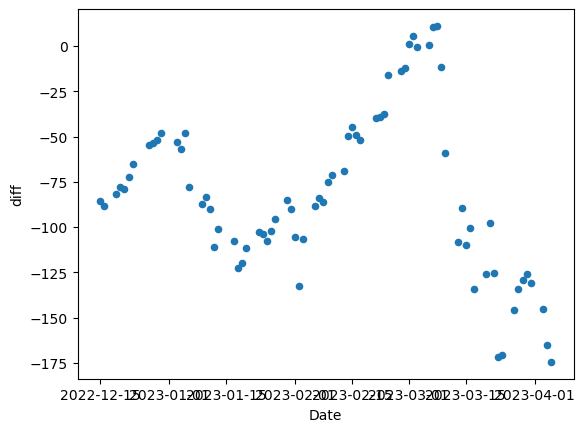

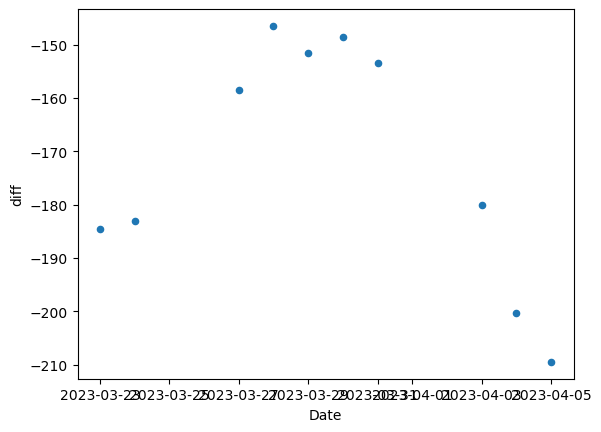

In [531]:
x = [i for i in new_df.columns if i != 'DFF']
y = new_df.index
z = new_df.to_numpy()

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='FFR Curves',
                  width = 1200,
                  height = 1200,
                  scene = {"aspectratio": {"x": 1, "y": 1, "z": .6}})
fig.update_coloraxes(cauto=True)
#fig.update_coloraxes(cmax=2000)
#fig.update_coloraxes(cmin=2000)
fig.show()